In [16]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation,TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [52]:
def readData():
    train = pd.read_csv("甘藍-初秋.csv")
    return train

def dropData(train):
    train=train.drop(["Unnamed: 0"], axis=1)
    train=train.drop(["crop_name"], axis=1)
    train=train.drop(["crop_num"], axis=1)
    train=train.drop(["market_name"], axis=1)
    train=train.drop(["market_num"], axis=1)
    return train

def sta(train):
    train= train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return train

def buildTrain(train, pastDay=1, futureDay=1):
    X_train, Y_train ,Z_train= [], [],[]
    for i in range(train.shape[0]-futureDay-pastDay+1):
        X_train.append(np.array(train.iloc[i:i+pastDay]))
        Y_train.append(np.array(train.iloc[i+pastDay:i+pastDay+futureDay]["high"]))
        Z_train.append(np.array(train.iloc[i+pastDay-1:i+pastDay+futureDay-1]["high"]))
    return np.array(X_train), np.array(Y_train), np.array(Z_train)
def shuffle(X,Y,Z):
    np.random.seed()
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList],Z[randomList]
def splitData(X,Y,Z,rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    Z_val = Z[:int(Z.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val,Z_val

def buildModel_1(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(10, input_length=train_x.shape[1],input_dim= train_x.shape[2]))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=10, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[10,0,0,0,0]
def buildModel_2(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(10, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(LSTM(10))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=10, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[10,10,0,0,0]
def buildModel_3(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(10, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(LSTM(10,return_sequences=True))
    model.add(LSTM(10))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[10,10,10,0,0]
def buildModel_4(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(10, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(LSTM(10,return_sequences=True))
    model.add(LSTM(10,return_sequences=True))
    model.add(LSTM(10))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[10,10,10,10,0]
def buildModel_5(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(10, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(LSTM(10,return_sequences=True))
    model.add(LSTM(10,return_sequences=True))
    model.add(LSTM(10,return_sequences=True))
    model.add(LSTM(10))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[10,10,10,10,10]
def buildModel_6(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(32, input_length=train_x.shape[1],input_dim= train_x.shape[2]))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[32,0,0,0,0]
def buildModel_7(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(32, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[32,32,0,0,0]
def buildModel_8(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(32, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[32,32,32,0,0]
def buildModel_9(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(32, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[32,32,32,32,0]
def buildModel_10(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(32, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(32,return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[32,32,32,32,32]
def buildModel_11(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(64, input_length=train_x.shape[1],input_dim= train_x.shape[2]))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[64,0,0,0,0]
def buildModel_12(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(64, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[64,64,0,0,0]
def buildModel_13(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(64, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[64,64,64,0,0]
def buildModel_14(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(64, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[64,64,64,64,0]
def buildModel_15(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(64, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[64,64,64,64,64]
def buildModel_16(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(128, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(Dropout(0.45))
    model.add(LSTM(128))
    model.add(Dropout(0.45))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[128,128,0,0,0]
def buildModel_17(train_x,train_y,bs):
    model = Sequential()
    model.add(LSTM(128, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
    model.add(Dropout(0.45))
    model.add(LSTM(128,return_sequences=True))
    model.add(Dropout(0.45))
    model.add(LSTM(128))
    model.add(Dropout(0.45))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
    model.fit(train_x,train_y, epochs=1000, batch_size=bs, validation_split=0.1, callbacks=[callback])
    return model,[128,128,128,0,0]
def predict(model,layer,val_x,val_y,val_z,x,y):
    a=range(0,val_y.shape[0])
    val_y=val_y.reshape(-1)
    val_z=val_z.reshape(-1)
    plt.plot(a,val_y)
    b=[]
    co=0
    for i in range(0,val_x.shape[0]):
        temp=val_x[i]
        temp=temp.reshape(1,1,9)
        z=int(model.predict(temp, verbose=0))
        if val_y[i]>=val_z[i] and z>=val_z[i]:
            co=co+1
        if val_y[i]<val_z[i] and z<val_z[i]:
            co=co+1
        b.append(z)
    b=np.array(b)
    b=b.reshape(-1)
    plt.plot(a,b)
    acc=100*(co/val_x.shape[0])
    print("accuracy:"+str(acc)+"%")
    plt.savefig('img/'+str(layer[0])+'+'+str(layer[1])+'+'+str(layer[2])+'+'+str(layer[3])+'+'+str(layer[4])+'+'+'ac,'+str(acc)+"%"+'+'+'lb,'+str(x)+'+'+'bs,'+str(y)+'.jpg')
    return str(acc)


C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(10, input_shape=(1, 9))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 10)                800       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________
Train on 1830 samples, validate on 204 samples
Epoch 1/10
1830/1830 [==============================] - 3s 2ms/step - loss: 929.4660 - val_loss: 917.4536
Epoch 2/10
1830/1830 [==============================] - 0s 11us/step - loss: 928.8698 - val_loss: 916.8550
Epoch 3/10
1830/1830 [==============================] - 0s 5us/step - loss: 928.2616 - val_loss: 916.2537
Epoch 4/10
1830/1830 [==============================] - 0s 8us/step - loss: 927.6653 - val_loss: 915.6467
Epoch 5/10
1830/1830 [==============================] - 0s 7us/step 

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:48: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(10, return_sequences=True, input_shape=(1, 9))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 1, 10)             800       
_________________________________________________________________
lstm_34 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________
Train on 1830 samples, validate on 204 samples
Epoch 1/10
1830/1830 [==============================] - 3s 2ms/step - loss: 928.7844 - val_loss: 916.7686
Epoch 2/10
1830/1830 [==============================] - 0s 11us/step - loss: 928.1999 - val_loss: 916.1748
Epoch 3/10
1830/1830 [==============================] - 0s 9us/step - loss: 927.5919 - val_loss: 915.5607
Epoch 4/10
1830/1830 [================

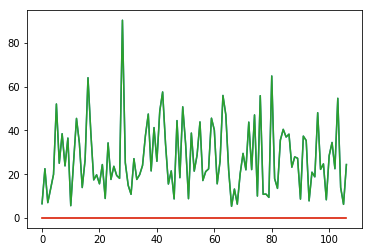

In [53]:
lookback=[1,3,5,7,14,21,30,60,90,120,150,180,210,240,270,300,330,360]
batch_size=[4,8,16,32,64,128,256]
col_name=["1","2","3","4","5","acc","lookback","batch_size"]
df=pd.DataFrame(columns=col_name)
for i in lookback:
    for j in batch_size:
        data=[]
        train=readData()
        train=dropData(train)
        temp=train
        train=sta(train)
        train_x1,train_y1,train_z1=buildTrain(train,i,1)
        train_x2,train_y2,train_z2=buildTrain(temp,i,1)
        train_x,train_y,train_z=train_x1,train_y2,train_z2
        train_x,train_y,train_z= shuffle(train_x,train_y,train_z)
        train_x,train_y, val_x, val_y ,val_z= splitData(train_x,train_y,train_z, 0.05)
        model_1,layer_1=buildModel_1(train_x,train_y,j)
        model_2,layer_2=buildModel_2(train_x,train_y,j)
        model_3,layer_3=buildModel_3(train_x,train_y,j)
        model_4,layer_4=buildModel_4(train_x,train_y,j)
        model_5,layer_5=buildModel_5(train_x,train_y,j)
        model_6,layer_6=buildModel_6(train_x,train_y,j)
        model_7,layer_7=buildModel_7(train_x,train_y,j)
        model_8,layer_8=buildModel_8(train_x,train_y,j)
        model_9,layer_9=buildModel_9(train_x,train_y,j)
        model_10,layer_10=buildModel_10(train_x,train_y,j)
        model_11,layer_11=buildModel_11(train_x,train_y,j)
        model_12,layer_12=buildModel_12(train_x,train_y,j)
        model_13,layer_13=buildModel_13(train_x,train_y,j)
        model_14,layer_14=buildModel_14(train_x,train_y,j)
        model_15,layer_15=buildModel_15(train_x,train_y,j)
        model_16,layer_16=buildModel_16(train_x,train_y,j)
        model_17,layer_17=buildModel_17(train_x,train_y,j)
        pre=predict(model_1,layer_1,val_x,val_y,val_z,i,j)
        layer=layer_1
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        pre=predict(model_2,layer_2,val_x,val_y,val_z,i,j)
        layer=layer_2
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_3,layer_3,val_x,val_y,val_z,i,j)
        layer=layer_3
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_4,layer_4,val_x,val_y,val_z,i,j)
        layer=layer_4
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_5,layer_5,val_x,val_y,val_z,i,j)
        layer=layer_5
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_6,layer_6,val_x,val_y,val_z,i,j)
        layer=layer_6
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_7,layer_7,val_x,val_y,val_z,i,j)
        layer=layer_7
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_8,layer_8,val_x,val_y,val_z,i,j)
        layer=layer_8
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_9,layer_9,val_x,val_y,val_z,i,j)
        layer=layer_9
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_10,layer_10,val_x,val_y,val_z,i,j)
        layer=layer_10
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_11,layer_11,val_x,val_y,val_z,i,j)
        layer=layer_11
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_12,layer_12,val_x,val_y,val_z,i,j)
        layer=layer_12
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_13,layer_13,val_x,val_y,val_z,i,j)
        layer=layer_13
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_14,layer_14,val_x,val_y,val_z,i,j)
        layer=layer_14
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_15,layer_15,val_x,val_y,val_z,i,j)
        layer=layer_15
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_16,layer_16,val_x,val_y,val_z,i,j)
        layer=layer_16
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        predict(model_17,layer_17,val_x,val_y,val_z,i,j)
        layer=layer_17
        data.append({"1":layer[0],"2":layer[1],"3":layer[2],"4":layer[3],"5":layer[4],"acc":pre,"lookback":i,"batch_size":j})
        df=pd.concat([pd.DataFrame(data), df], ignore_index=True,sort=True)
df.to_csv('data.csv', encoding='utf_8_sig')

accuracy:60.747663551401864%


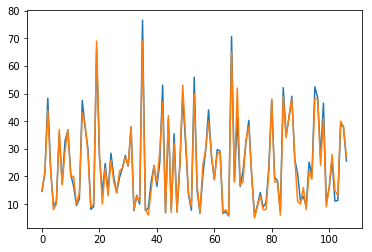

In [15]:
predict(model_3,val_x,val_y,val_z)